In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

### Dataset Preperation

In [2]:
# X are the coordinates and Y are the labels for the class
X,Y = make_blobs(n_samples = 500,n_features=2,centers =5 ,random_state = 3)
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


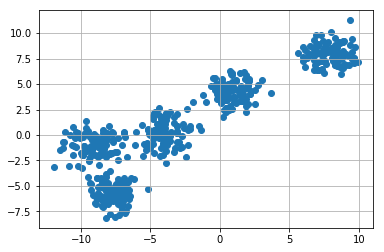

In [3]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])


In [4]:
k = 5
color = ["green","red","blue","yellow","orange"]

clusters = {}

for i in range(k):
    center = 10*(2*np.random.random(X.shape[1])-1)
    points = []
    
    cluster = {
        'center':center,
        'points':points,
        'color':color[i]
        
    }
    
    clusters[i] = cluster

In [5]:
clusters

{0: {'center': array([-1.5556071 ,  5.69848372]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-4.65211621, -5.75079515]),
  'points': [],
  'color': 'red'},
 2: {'center': array([ 4.46331229, -7.33295332]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ 6.41533213, -0.4468593 ]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-2.6924882 , -5.99358044]),
  'points': [],
  'color': 'orange'}}

In [6]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [7]:
#v1 = np.array([1,2])
#v2 = np.array([3,4])
#distance(v1,v2)

In [8]:
# Assign every data point to one of the clusters
def assignPointToClusters(clusters):
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]
    
        for kx in range(k):
        
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        current_cluster = np.argmin(dist) # argmin() return the index of min value
    
        clusters[current_cluster]['points'].append(curr_x)
    

In [9]:
# We Update every cluster center according to the mean of the point in it.
def updateClusters(clusters):
    
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0] > 0: # If a clusters has some non-zero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] # Clear the list

In [10]:
def plotClusters(clusters):
    
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        # plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1])
        except:
            pass
        
        # Plot cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker='*')
            

In [11]:
assignPointToClusters(clusters)

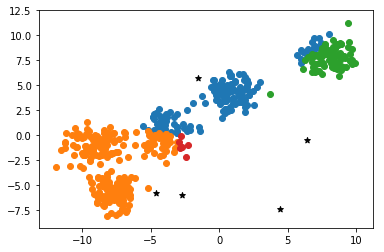

In [12]:
plotClusters(clusters)
updateClusters(clusters)
assignPointToClusters(clusters)

# Using Sci-Kit Learn

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [14]:
X,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=5)

In [17]:
kmeans.fit(X,y)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
centers = kmeans.cluster_centers_

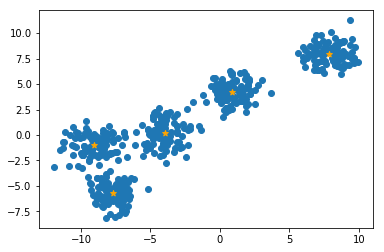

In [19]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0],centers[:,1],marker='*',color='orange')
plt.show()

In [20]:
pred = kmeans.labels_
print(pred)

[1 2 3 1 1 3 4 1 2 1 2 3 2 1 3 1 2 1 1 2 0 0 1 3 1 0 4 4 3 4 1 4 0 0 1 0 2
 2 1 0 0 0 4 4 3 2 2 4 4 4 2 1 4 1 1 0 1 1 2 3 2 3 3 1 4 2 3 3 0 3 0 1 0 1
 0 3 1 4 0 0 3 0 3 4 2 4 3 2 4 3 4 0 1 0 0 2 1 3 3 0 2 0 3 3 2 2 2 3 3 1 2
 4 1 2 3 0 2 4 0 3 2 3 4 1 0 4 4 4 1 1 3 3 1 2 2 4 3 4 3 1 1 0 3 2 4 1 2 2
 1 3 1 1 3 3 2 0 0 4 3 1 0 2 4 0 2 0 2 0 0 0 4 1 0 2 0 4 1 3 2 4 2 1 2 0 4
 4 0 1 3 2 0 3 4 1 4 0 3 4 1 1 1 0 0 2 1 4 4 1 2 1 1 1 0 2 3 2 1 1 2 4 3 4
 4 0 1 3 1 3 4 0 3 3 1 0 1 0 3 2 3 0 0 2 1 1 3 3 0 2 0 1 4 2 4 1 4 4 4 4 2
 0 2 1 0 2 4 3 2 2 2 4 1 1 3 0 0 2 3 3 1 3 4 3 2 2 4 4 0 4 4 2 0 1 3 0 3 4
 3 3 2 1 0 2 0 0 1 4 0 3 0 4 1 1 3 2 0 4 2 0 3 4 2 4 1 0 4 3 3 0 0 0 1 4 0
 1 2 3 3 4 2 2 3 3 4 0 0 0 1 4 2 4 1 0 2 2 3 0 0 4 0 4 3 3 3 4 0 1 0 3 4 4
 2 1 2 4 1 4 3 2 0 2 3 1 1 2 2 0 2 0 4 3 2 4 1 1 2 3 0 4 1 1 1 4 2 0 2 2 2
 4 0 3 2 3 3 4 3 1 3 1 2 0 0 1 2 4 1 0 3 2 4 3 4 4 2 4 3 4 2 4 3 4 1 0 0 4
 0 2 0 0 4 1 1 3 4 0 3 4 3 2 3 2 1 0 3 1 3 1 1 0 1 0 4 2 2 3 1 1 4 4 2 4 4
 2 4 2 2 2 4 0 4 3 2 3 3 

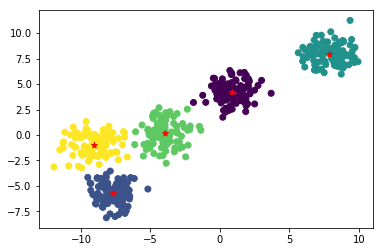

In [21]:
plt.scatter(X[:,0],X[:,1],c=pred)
plt.scatter(centers[:,0],centers[:,1],marker='*',color='red')
plt.show()

# K-Means and DBSCAN

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles,make_moons

In [23]:
X,Y = make_moons(n_samples=200,noise=0.10)

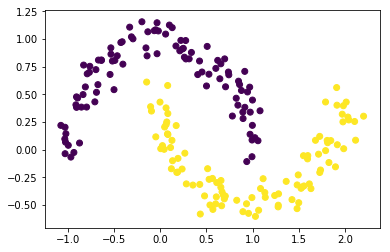

In [24]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [25]:
from sklearn.cluster import KMeans

In [26]:
km = KMeans(n_clusters=2)


In [27]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
centers = km.cluster_centers_
labels = km.labels_
print(centers.shape)

(2, 2)


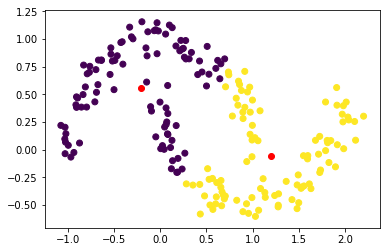

In [29]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centers[:,0],centers[:,1],c='red')
plt.show()

# DBSCAN
- Density Based Spatial Clustering of Application with Noise
- Based upon the idea, that a cluster is a high density area surrounded by low density region
- Starts by exploring a small area, if density is "good enough" it considered as part of cluster, and explore neighbors and so on, so it groups regions based upon density! 

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
# eps => is the distances b/t two neighbors 
# min_samples => are the no. of samples to be considerd as a small area  

dbs = DBSCAN(eps=0.2,min_samples=5)

In [32]:
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [33]:
Ypred = dbs.fit_predict(X)

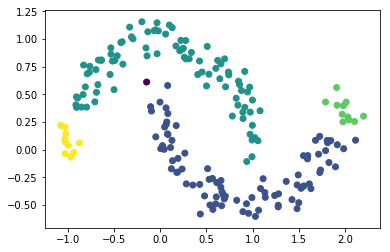

In [34]:
plt.scatter(X[:,0],X[:,1],c=Ypred)
plt.show()

# Dominant color Extraction for image Segmentation
- Image Segmentation
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

In [122]:
import cv2
import matplotlib.pyplot as plt

In [123]:
im = cv2.imread("elephant.jpg")

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(830, 1000, 3)


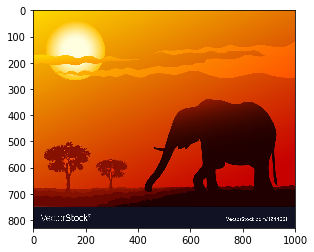

In [124]:
plt.imshow(im) # as RGB Format
plt.show()

In [125]:
#  Flattern each Channel of the image
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(830000, 3)


In [126]:
from sklearn.cluster import KMeans

In [141]:
dominant_colors = 5

km = KMeans(n_clusters = dominant_colors)

km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [142]:
centers = km.cluster_centers_
print(centers)

#in 3-d space u need 3 points to draw cluster center,therefore there is R-axis , G-axis and B-axis

[[ 29.53370356   8.20761204  15.14518618]
 [237.55879218 135.81852882   1.47010311]
 [213.05042134  56.63495814   0.66588365]
 [251.16200385 236.44057803 169.56350674]
 [110.98533169  13.58480079   2.15310128]]


In [143]:
centers = np.array(centers,dtype='uint8')
print(centers)

#  R.   G.   B

[[ 29   8  15]
 [237 135   1]
 [213  56   0]
 [251 236 169]
 [110  13   2]]


### Plot what all colors are these ?

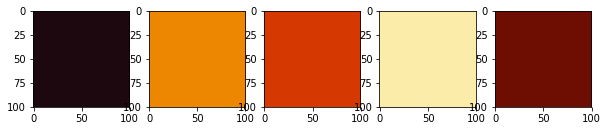

In [145]:
i = 1

plt.figure(0,figsize=(10,2))

colors =[]

for curr_col in centers:
    
    plt.subplot(1,5,i)# subplot(nrows,ncol,index)
    #plt.axis('off')
    plt.axis()
    i+=1
    
    colors.append(curr_col)
    
    # Color swatch
    
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]= curr_col
    
    
    plt.imshow(a)
plt.show()


In [146]:
#plt.figure?

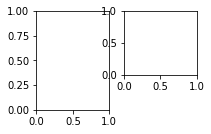

In [147]:
plt.subplot(2,4,1)
plt.subplot(3,4,2)

# Segmenting Our Original Image

In [148]:
new_img = np.zeros((830*1000,3),dtype=('uint8'))
print(new_img.shape)

(830000, 3)


In [149]:
colors

[array([29,  8, 15], dtype=uint8),
 array([237, 135,   1], dtype=uint8),
 array([213,  56,   0], dtype=uint8),
 array([251, 236, 169], dtype=uint8),
 array([110,  13,   2], dtype=uint8)]

In [150]:
km.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [151]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
new_img = new_img.reshape((original_shape))



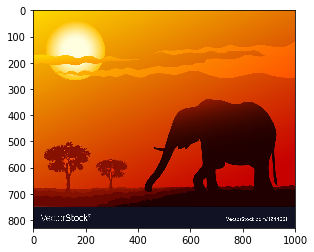

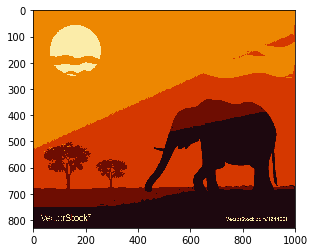

In [152]:
plt.imshow(im)
plt.show()
plt.imshow(new_img)
plt.show()

